In [1]:
import numpy as np # for mathematical operations
import pandas as pd # for data manipulation and analysis
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the file
dt=pd.read_csv('winequality.csv')

In [3]:
dt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking the shape of the dataset
dt.shape

(1599, 12)

In [5]:
# checking the datatypes
dt.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
# Statstical Analysis
dt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#gain some info about dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#checking the null values.
dt.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# checking the counts for quality
dt['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

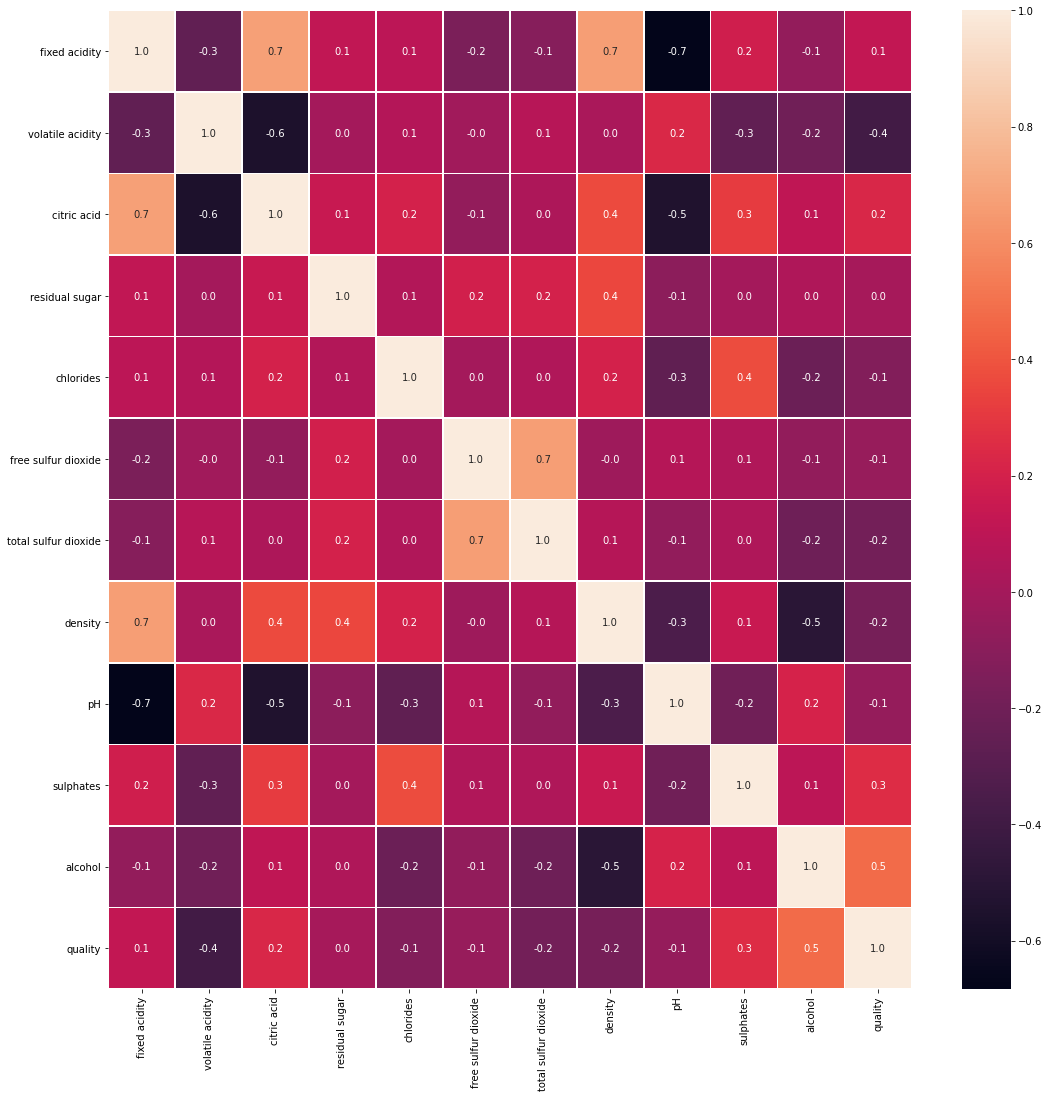

In [10]:
# ploting the heatmap on corelation
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(dt.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)

In [11]:
#categorize wine quality
bins = (2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(dt['quality'], bins, labels = group_names)
dt['quality'] = categories

In [12]:
#after categorize
dt['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

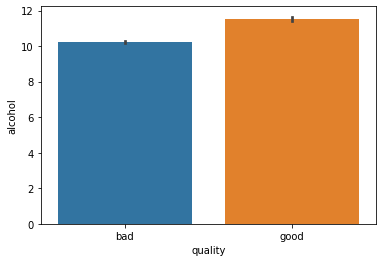

In [13]:
#barplot of quality vs alcohol.
# more alcohol, better red wine
sns.barplot(x='quality', y='alcohol',data=dt)

In [14]:
#splitting data to X and y
X = dt.drop(['quality'], axis = 1)
y = dt['quality']

In [15]:
# Encoding our dependent variable:Quality column
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# Splitting the dataset into the Training set and Test set.%20 of dataset for test set,%80 for training set.
from sklearn.model_selection import train_test_split
X_1,X_test,y_1,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)
print("X_train shape: ",X_train.shape, "y_train shape: ",y_train.shape)
print("X_cv shape: ",X_cv.shape, "y_cv shape: ",y_cv.shape)
print("X_test shape: ",X_test.shape, "y_test shape: ",y_test.shape)

X_train shape:  (1023, 11) y_train shape:  (1023,)
X_cv shape:  (256, 11) y_cv shape:  (256,)
X_test shape:  (320, 11) y_test shape:  (320,)


In [17]:
#fitting the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
depth_val=[2,4,6,8,10,12,14,16,18,20]
for d in depth_val:
    clf=DecisionTreeClassifier(criterion='gini',max_depth=d)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_cv)
    print("Accuracy : ",accuracy_score(y_cv,y_pred),"for",d)

Accuracy :  0.890625 for 2
Accuracy :  0.8984375 for 4
Accuracy :  0.890625 for 6
Accuracy :  0.89453125 for 8
Accuracy :  0.8828125 for 10
Accuracy :  0.8984375 for 12
Accuracy :  0.89453125 for 14
Accuracy :  0.8828125 for 16
Accuracy :  0.87890625 for 18
Accuracy :  0.88671875 for 20


In [18]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=16)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.875


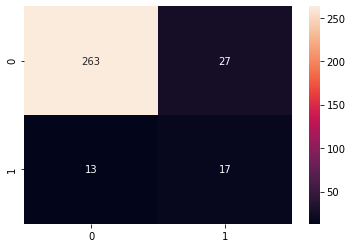

In [19]:
#making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

[Text(450.3423913043478, 520.95, 'X[10] <= 11.55\ngini = 0.252\nsamples = 1023\nvalue = [872, 151]'),
 Text(233.13179347826087, 475.65000000000003, 'X[1] <= 0.375\ngini = 0.168\nsamples = 864\nvalue = [784, 80]'),
 Text(97.80163043478261, 430.35, 'X[10] <= 10.45\ngini = 0.421\nsamples = 153\nvalue = [107, 46]'),
 Text(45.48913043478261, 385.05, 'X[0] <= 11.7\ngini = 0.221\nsamples = 79\nvalue = [69, 10]'),
 Text(27.293478260869563, 339.75, 'X[9] <= 1.07\ngini = 0.133\nsamples = 70\nvalue = [65, 5]'),
 Text(18.195652173913043, 294.45, 'X[2] <= 0.145\ngini = 0.084\nsamples = 68\nvalue = [65, 3]'),
 Text(9.097826086956522, 249.14999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(27.293478260869563, 249.14999999999998, 'X[10] <= 10.15\ngini = 0.058\nsamples = 67\nvalue = [65, 2]'),
 Text(18.195652173913043, 203.84999999999997, 'gini = 0.0\nsamples = 56\nvalue = [56, 0]'),
 Text(36.391304347826086, 203.84999999999997, 'X[3] <= 1.6\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),


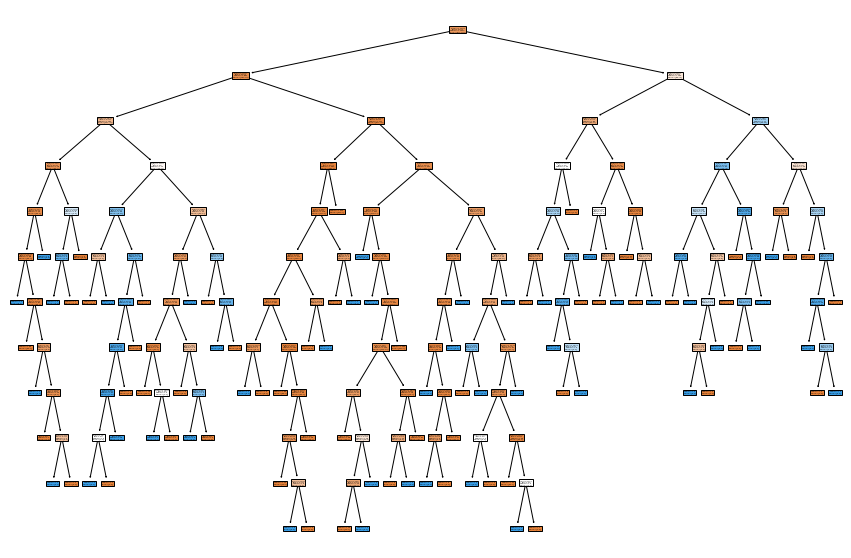

In [20]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)